<a href="https://colab.research.google.com/github/bcdanl/320-code/blob/main/danl_320_script_clustering_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances, calinski_harabasz_score, silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

protein = pd.read_csv("https://bcdanl.github.io/data/protein.csv")

In [2]:
protein

,Country,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,FrVeg
0,Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
1,Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
2,Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
3,Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
4,Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0
5,Denmark,10.6,10.8,3.7,25.0,9.9,21.9,4.8,0.7,2.4
6,E Germany,8.4,11.6,3.7,11.1,5.4,24.6,6.5,0.8,3.6
7,Finland,9.5,4.9,2.7,33.7,5.8,26.3,5.1,1.0,1.4
8,France,18.0,9.9,3.3,19.5,5.7,28.1,4.8,2.4,6.5
9,Greece,10.2,3.0,2.8,17.6,5.9,41.7,2.2,7.8,6.5


## Scaling

In [3]:
vars_to_use = protein.columns[1:]
scaler = StandardScaler()

# computes those means and standard deviations on your selected columns
  # and returns a NumPy array (`pmatrix`)
  # where each column now has mean 0 and variance 1.
pmatrix = scaler.fit_transform(protein[vars_to_use])

pcenter, pscale = scaler.mean_, scaler.scale_

In [4]:
pmatrix

array([[ 0.08294065, -1.79475017, -2.22458425, -1.1795703 , -1.22503282,
         0.9348045 , -2.29596509,  1.24796771, -1.37825141],
       [-0.28297397,  1.68644628,  1.24562107,  0.40046785, -0.6551106 ,
        -0.39505069, -0.42221774, -0.91079027,  0.09278868],
       [ 1.11969872,  0.38790475,  1.06297868,  0.05573225,  0.06479116,
        -0.5252463 ,  0.88940541, -0.49959828, -0.07694671],
       [-0.6183957 , -0.52383718, -1.22005113, -1.2657542 , -0.92507375,
         2.27395937, -1.98367386,  0.32278572,  0.03621022],
       [-0.03903089,  0.96810416, -0.12419682, -0.6624669 , -0.6851065 ,
         0.19082957,  0.45219769, -1.01358827, -0.07694671],
       [ 0.23540507,  0.8023329 ,  0.69769391,  1.13303099,  1.68457011,
        -0.96233157,  0.3272812 , -1.21918427, -0.98220215],
       [-0.43543839,  1.02336124,  0.69769391, -0.86356267,  0.33475432,
        -0.71124003,  1.38907137, -1.16778527, -0.30326057],
       [-0.10001666, -0.82775116, -0.21551801,  2.38269753,  0

In [5]:
pcenter

array([ 9.828,  7.896,  2.936, 17.112,  4.284, 32.248,  4.276,  3.072,
        4.136])

In [6]:
pscale

array([ 3.27945361,  3.61944526,  1.09503607,  6.96185722,  3.33378824,
       10.75305054,  1.60106964,  1.94556316,  1.76745693])

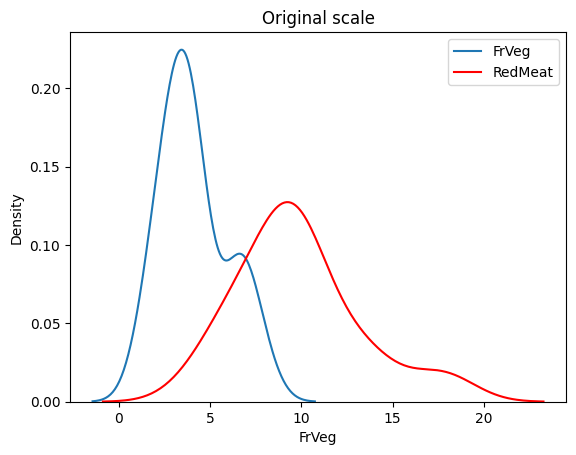

In [7]:
fig, ax = plt.subplots()
sns.kdeplot(data=protein, x="FrVeg", ax=ax, label="FrVeg")
sns.kdeplot(data=protein, x="RedMeat", ax=ax, color="red", label="RedMeat")
ax.set_title("Original scale"); ax.legend(); plt.show()

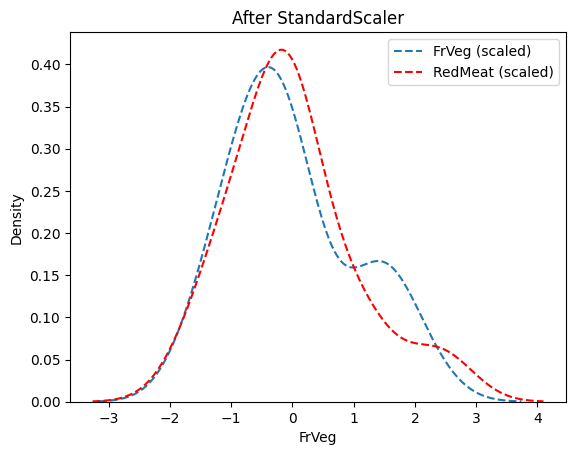

In [8]:
scaled_df = pd.DataFrame(pmatrix, columns=vars_to_use)
fig, ax = plt.subplots()
sns.kdeplot(data=scaled_df, x="FrVeg", ax=ax, linestyle="--", label="FrVeg (scaled)")
sns.kdeplot(data=scaled_df, x="RedMeat", ax=ax, color="red", linestyle="--",
            label="RedMeat (scaled)")
ax.set_title("After StandardScaler"); ax.legend(); plt.show()

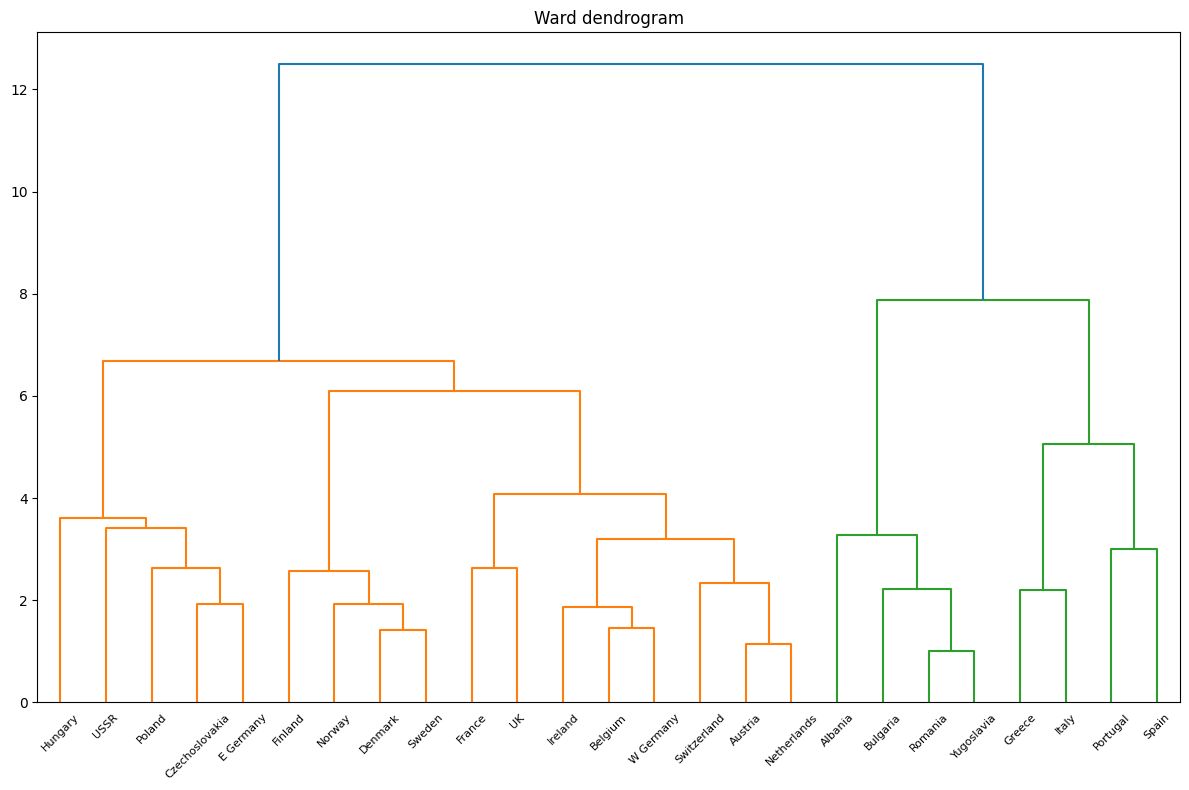

In [10]:
link = linkage(pmatrix, method="ward")
plt.figure(figsize=(12, 8))
dendrogram(link, labels=protein["Country"].values, leaf_font_size=8)
plt.title("Ward dendrogram"); plt.tight_layout(); plt.show()

In [11]:
groups_hc = fcluster(link, t=5, criterion="maxclust")      # k = 5

# Convenience: print selected cols by cluster
def print_clusters(df: pd.DataFrame, labels, cols):
    for k, sub in df.assign(cluster=labels).groupby("cluster"):
        print(f"\nCluster {k} ({len(sub)} obs)")
        print(sub[cols].to_string(index=False))

cols_to_print = ["Country", "RedMeat", "Fish", "FrVeg"]
print_clusters(protein, groups_hc, cols_to_print)


Cluster 1 (5 obs)
       Country  RedMeat  Fish  FrVeg
Czechoslovakia      9.7   2.0    4.0
     E Germany      8.4   5.4    3.6
       Hungary      5.3   0.3    4.2
        Poland      6.9   3.0    6.6
          USSR      9.3   3.0    2.9

Cluster 2 (4 obs)
Country  RedMeat  Fish  FrVeg
Denmark     10.6   9.9    2.4
Finland      9.5   5.8    1.4
 Norway      9.4   9.7    2.7
 Sweden      9.9   7.5    2.0

Cluster 3 (8 obs)
    Country  RedMeat  Fish  FrVeg
    Austria      8.9   2.1    4.3
    Belgium     13.5   4.5    4.0
     France     18.0   5.7    6.5
    Ireland     13.9   2.2    2.9
Netherlands      9.5   2.5    3.7
Switzerland     13.1   2.3    4.9
         UK     17.4   4.3    3.3
  W Germany     11.4   3.4    3.8

Cluster 4 (4 obs)
   Country  RedMeat  Fish  FrVeg
   Albania     10.1   0.2    1.7
  Bulgaria      7.8   1.2    4.2
   Romania      6.2   1.0    2.8
Yugoslavia      4.4   0.6    3.2

Cluster 5 (4 obs)
 Country  RedMeat  Fish  FrVeg
  Greece     10.2   5.9    6.5


In [12]:
pca = PCA().fit(pmatrix)
proj = pca.transform(pmatrix)[:, :2]                # first 2 PCs

proj_df = (
    pd.DataFrame(proj, columns=["PC1", "PC2"])
      .assign(cluster=groups_hc.astype(str),
              country=protein["Country"])
)

In [13]:
proj_df

,PC1,PC2,cluster,country
0,3.557238,-1.664102,4,Albania
1,-1.452006,-1.062702,3,Austria
2,-1.655480,0.162784,3,Belgium
3,3.198708,-1.327895,4,Bulgaria
4,-0.378104,-0.615096,1,Czechoslovakia
5,-2.414042,0.291332,2,Denmark
6,-1.451538,0.459586,1,E Germany
7,-1.596104,-0.608293,2,Finland
8,-1.518666,0.801560,3,France
9,2.285884,1.021701,5,Greece


In [14]:
# print first 3 loading vectors
loadings_protein = pd.DataFrame(pca.components_.T, index = protein.drop(columns="Country").columns,
                                columns=[f"PC{i}" for i in range(1, pca.n_components_+1)])
print(loadings_protein.iloc[:, :3].round(2))

            PC1   PC2   PC3
RedMeat   -0.30 -0.06 -0.30
WhiteMeat -0.31 -0.24  0.62
Eggs      -0.43 -0.04  0.18
Milk      -0.38 -0.18 -0.39
Fish      -0.14  0.65 -0.32
Cereals    0.44 -0.23  0.10
Starch    -0.30  0.35  0.24
Nuts       0.42  0.14 -0.05
FrVeg      0.11  0.54  0.41


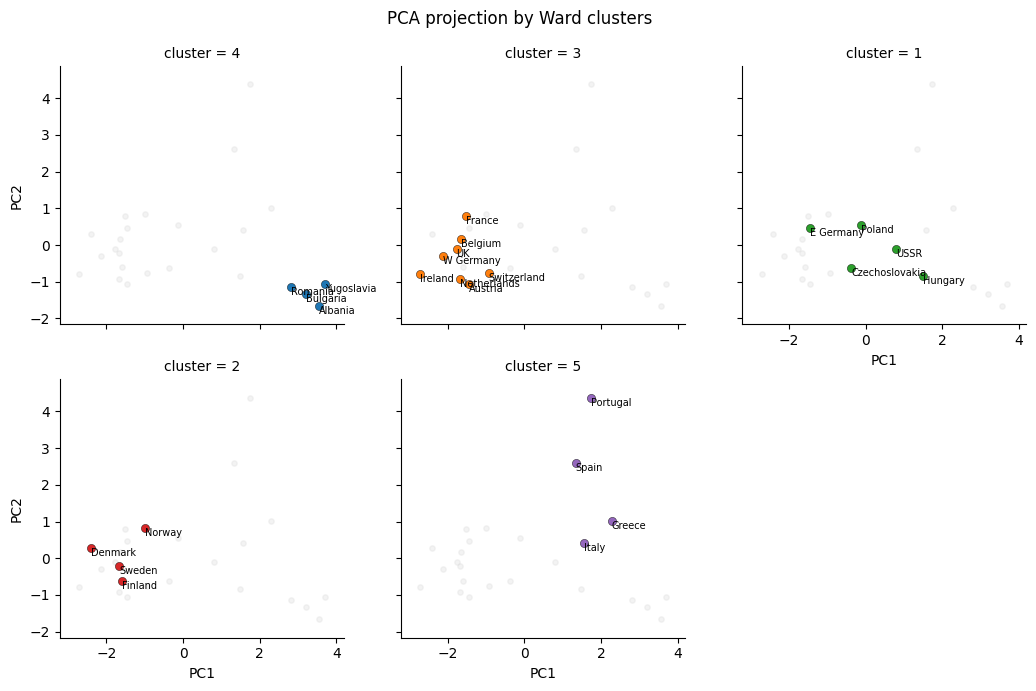

In [15]:
# Global axis limits so every facet is identical
xlim = proj_df["PC1"].min() - .5, proj_df["PC1"].max() + .5
ylim = proj_df["PC2"].min() - .5, proj_df["PC2"].max() + .5

# Create FacetGrid with shared axes
g = sns.FacetGrid(
        proj_df, col="cluster", col_wrap=3, height=3.5,
        sharex=True, sharey=True, hue="cluster", palette="tab10"
    )
# --------------------------------------------------
# Helper that draws the full background cloud
# --------------------------------------------------
def background_scatter(x, y, **kwargs):
    """Ignore facet-specific x & y — plot all points instead."""
    plt.scatter(
        proj_df["PC1"], proj_df["PC2"],
        color="lightgray", alpha=.25, s=15, zorder=1
    )

# Plot the background in every facet
g.map(background_scatter, "PC1", "PC2")

# Foreground: cluster-specific points
g.map_dataframe(
    sns.scatterplot, x="PC1", y="PC2",
    edgecolor="black", linewidth=.3, s=35, zorder=2
)

# Text labels for the cluster’s own points
def annotate(data, **k):
    for x, y, label in zip(data.PC1, data.PC2, data.country):
        plt.text(x, y, label, fontsize=7, ha="left", va="top")
g.map_dataframe(annotate)

# Apply identical limits to every axis
for ax in g.axes.flat:
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

g.fig.subplots_adjust(top=.9)
g.fig.suptitle("PCA projection by Ward clusters")
plt.show()

In [16]:
k = 5
kmeans = KMeans(n_clusters= k, n_init=100, max_iter=100, random_state=1)
groups_km = kmeans.fit_predict(pmatrix)

print("k-means cluster sizes:", np.bincount(groups_km))
print_clusters(protein, groups_km + 1, cols_to_print)

k-means cluster sizes: [5 4 8 4 4]

Cluster 1 (5 obs)
       Country  RedMeat  Fish  FrVeg
Czechoslovakia      9.7   2.0    4.0
     E Germany      8.4   5.4    3.6
       Hungary      5.3   0.3    4.2
        Poland      6.9   3.0    6.6
          USSR      9.3   3.0    2.9

Cluster 2 (4 obs)
   Country  RedMeat  Fish  FrVeg
   Albania     10.1   0.2    1.7
  Bulgaria      7.8   1.2    4.2
   Romania      6.2   1.0    2.8
Yugoslavia      4.4   0.6    3.2

Cluster 3 (8 obs)
    Country  RedMeat  Fish  FrVeg
    Austria      8.9   2.1    4.3
    Belgium     13.5   4.5    4.0
     France     18.0   5.7    6.5
    Ireland     13.9   2.2    2.9
Netherlands      9.5   2.5    3.7
Switzerland     13.1   2.3    4.9
         UK     17.4   4.3    3.3
  W Germany     11.4   3.4    3.8

Cluster 4 (4 obs)
Country  RedMeat  Fish  FrVeg
Denmark     10.6   9.9    2.4
Finland      9.5   5.8    1.4
 Norway      9.4   9.7    2.7
 Sweden      9.9   7.5    2.0

Cluster 5 (4 obs)
 Country  RedMeat  Fish  Fr

In [17]:
krange = range(2, 11)      # k = 2…10  (k=1 undefined for CH/ASW)
ch_scores, asw_scores = [], []

for k in krange:
    lbls = KMeans(n_clusters=k, n_init=20, random_state=0).fit_predict(pmatrix)
    ch_scores.append(calinski_harabasz_score(pmatrix, lbls))
    asw_scores.append(silhouette_score(pmatrix, lbls))

best_k_ch  = krange[np.argmax(ch_scores)]
best_k_asw = krange[np.argmax(asw_scores)]
print(f"Best k by CH : {best_k_ch}")
print(f"Best k by ASW: {best_k_asw}")

Best k by CH : 2
Best k by ASW: 3


In [18]:
k = 3
kmeans = KMeans(n_clusters= k, n_init=100, max_iter=100, random_state=1)
groups_km = kmeans.fit_predict(pmatrix)

print("k-means cluster sizes:", np.bincount(groups_km))
print_clusters(protein, groups_km + 1, cols_to_print)

k-means cluster sizes: [15  6  4]

Cluster 1 (15 obs)
       Country  RedMeat  Fish  FrVeg
       Austria      8.9   2.1    4.3
       Belgium     13.5   4.5    4.0
Czechoslovakia      9.7   2.0    4.0
       Denmark     10.6   9.9    2.4
     E Germany      8.4   5.4    3.6
       Finland      9.5   5.8    1.4
        France     18.0   5.7    6.5
       Ireland     13.9   2.2    2.9
   Netherlands      9.5   2.5    3.7
        Norway      9.4   9.7    2.7
        Poland      6.9   3.0    6.6
        Sweden      9.9   7.5    2.0
   Switzerland     13.1   2.3    4.9
            UK     17.4   4.3    3.3
     W Germany     11.4   3.4    3.8

Cluster 2 (6 obs)
   Country  RedMeat  Fish  FrVeg
   Albania     10.1   0.2    1.7
  Bulgaria      7.8   1.2    4.2
   Hungary      5.3   0.3    4.2
   Romania      6.2   1.0    2.8
      USSR      9.3   3.0    2.9
Yugoslavia      4.4   0.6    3.2

Cluster 3 (4 obs)
 Country  RedMeat  Fish  FrVeg
  Greece     10.2   5.9    6.5
   Italy      9.0   3.4

In [19]:
k = 2
kmeans = KMeans(n_clusters= k, n_init=100, max_iter=100, random_state=1)
groups_km = kmeans.fit_predict(pmatrix)

print("k-means cluster sizes:", np.bincount(groups_km))
print_clusters(protein, groups_km + 1, cols_to_print)

k-means cluster sizes: [15 10]

Cluster 1 (15 obs)
       Country  RedMeat  Fish  FrVeg
       Austria      8.9   2.1    4.3
       Belgium     13.5   4.5    4.0
Czechoslovakia      9.7   2.0    4.0
       Denmark     10.6   9.9    2.4
     E Germany      8.4   5.4    3.6
       Finland      9.5   5.8    1.4
        France     18.0   5.7    6.5
       Ireland     13.9   2.2    2.9
   Netherlands      9.5   2.5    3.7
        Norway      9.4   9.7    2.7
        Poland      6.9   3.0    6.6
        Sweden      9.9   7.5    2.0
   Switzerland     13.1   2.3    4.9
            UK     17.4   4.3    3.3
     W Germany     11.4   3.4    3.8

Cluster 2 (10 obs)
   Country  RedMeat  Fish  FrVeg
   Albania     10.1   0.2    1.7
  Bulgaria      7.8   1.2    4.2
    Greece     10.2   5.9    6.5
   Hungary      5.3   0.3    4.2
     Italy      9.0   3.4    6.7
  Portugal      6.2  14.2    7.9
   Romania      6.2   1.0    2.8
     Spain      7.1   7.0    7.2
      USSR      9.3   3.0    2.9
Yugosla

# NBC Shows

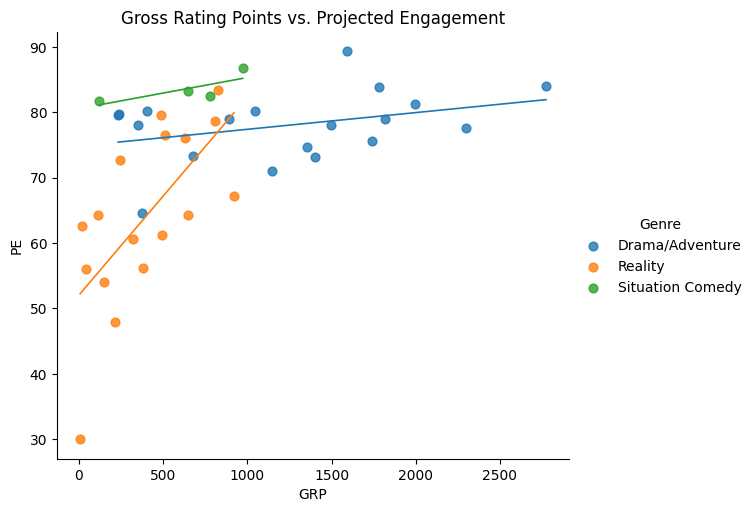

In [20]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm

# ---------------------------------------------------------
# 1.  TV-show metadata
# ---------------------------------------------------------
url_shows   = "https://bcdanl.github.io/data/nbc_show.csv"
shows = (
    pd.read_csv(url_shows, index_col=0)
      .assign(Genre=lambda d: d["Genre"].astype("category"))
)
# quick glance
sns.lmplot(
    data=shows, x="GRP", y="PE",
    hue="Genre", height=5, aspect=1.2, scatter_kws=dict(s=40, alpha=.8),
    line_kws=dict(linewidth=1.2), ci=None
)
plt.title("Gross Rating Points vs. Projected Engagement")
plt.show()

In [21]:
url_survey  = "https://bcdanl.github.io/data/nbc_survey.csv"
survey = pd.read_csv(url_survey)

# lock survey Show order to match *shows* index
survey["Show"] = pd.Categorical(
    survey["Show"], categories=shows.index, ordered=True
)

# average each question by show (drops first two cols = Show, Viewer)
pilot_avg = (
    survey
      .drop(columns=survey.columns[:2])
      .join(survey["Show"])
      .groupby("Show")
      .mean()
      .reindex(shows.index)              # make absolutely sure the order matches
)

<ipython-input-21-09267d3fd608>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("Show")


In [22]:
survey

,Viewer,Show,Q1_Attentive,Q1_Excited,Q1_Happy,Q1_Engaged,Q1_Curious,Q1_Motivated,Q1_Comforted,Q1_Annoyed,...,Q2_Funny,Q2_Confusing,Q2_Predictable,Q2_Entertaining,Q2_Fantasy,Q2_Original,Q2_Believable,Q2_Boring,Q2_Dramatic,Q2_Suspenseful
0,71,Iron Chef America,3,4,4,3,5,4,3,2,...,2,2,4,3,1,3,5,2,2,4
1,71,Trading Spaces: All Stars,4,4,3,4,5,2,3,3,...,3,1,3,4,2,4,4,2,3,4
2,71,House Hunters,4,4,4,5,5,3,3,2,...,4,2,3,5,4,5,2,1,4,4
3,71,What Not to Wear,4,3,3,3,4,2,2,4,...,3,2,5,4,4,3,3,2,3,4
4,71,America's Next Top Model,4,4,3,4,4,4,3,3,...,2,1,3,4,2,3,3,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6236,3595,America's Next Top Model,3,3,3,3,3,3,3,3,...,3,2,1,3,4,2,2,3,2,1
6237,3597,Real World XVIII Denver Launch,5,5,3,5,5,3,3,1,...,5,1,3,5,3,5,5,1,5,5
6238,3598,America's Next Top Model,3,3,3,3,3,3,3,3,...,2,2,3,3,3,3,3,3,4,1
6239,3600,Project Runway,5,3,2,5,4,3,3,1,...,4,2,3,4,1,5,2,1,3,3


In [23]:
survey.columns

Index(['Viewer', 'Show', 'Q1_Attentive', 'Q1_Excited', 'Q1_Happy',
       'Q1_Engaged', 'Q1_Curious', 'Q1_Motivated', 'Q1_Comforted',
       'Q1_Annoyed', 'Q1_Indifferent', 'Q2_Relatable', 'Q2_Funny',
       'Q2_Confusing', 'Q2_Predictable', 'Q2_Entertaining', 'Q2_Fantasy',
       'Q2_Original', 'Q2_Believable', 'Q2_Boring', 'Q2_Dramatic',
       'Q2_Suspenseful'],
      dtype='object')

In [25]:
(
        survey
      .drop(columns=survey.columns[:2])
      .join(survey["Show"])
      .groupby("Show")
      .mean()
      .reindex(shows.index)              # make absolutely sure the order matches

)

<ipython-input-25-8d27fda2bd8e>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("Show")


,Q1_Attentive,Q1_Excited,Q1_Happy,Q1_Engaged,Q1_Curious,Q1_Motivated,Q1_Comforted,Q1_Annoyed,Q1_Indifferent,Q2_Relatable,Q2_Funny,Q2_Confusing,Q2_Predictable,Q2_Entertaining,Q2_Fantasy,Q2_Original,Q2_Believable,Q2_Boring,Q2_Dramatic,Q2_Suspenseful
Show,,,,,,,,,,,,,,,,,,,,
Living with Ed,3.890244,3.780488,3.926829,3.865854,3.804878,3.609756,3.573171,2.609756,3.121951,3.719512,3.926829,2.560976,3.402439,4.134146,3.353659,3.914634,3.878049,2.621951,3.512195,3.500000
Monarch Cove,4.046154,3.861538,3.830769,3.876923,4.000000,3.938462,3.907692,2.969231,3.153846,3.984615,3.784615,2.769231,3.461538,4.107692,3.338462,4.153846,3.876923,2.553846,4.015385,3.707692
Top Chef,3.845745,3.595745,3.632979,3.771277,3.856383,3.196809,3.000000,2.191489,2.398936,3.218085,3.569149,1.840426,2.851064,4.297872,2.489362,3.845745,3.547872,1.829787,3.606383,3.180851
Iron Chef America,3.910053,3.693122,3.613757,3.851852,3.936508,3.333333,3.047619,2.116402,2.439153,3.132275,3.539683,1.947090,2.878307,4.227513,2.513228,3.777778,3.687831,1.915344,3.560847,3.269841
Trading Spaces: All Stars,3.807487,3.540107,3.513369,3.780749,3.909091,3.294118,2.802139,2.101604,2.427807,3.229947,3.481283,1.871658,2.754011,4.149733,2.304813,3.839572,3.780749,1.855615,3.310160,3.016043
Lisa Williams: Life Among the Dead,3.716216,3.648649,3.554054,3.662162,3.756757,3.567568,3.378378,2.202703,2.581081,3.472973,3.378378,2.216216,2.770270,4.000000,3.013514,3.878378,3.797297,1.905405,3.756757,3.527027
Project Runway,3.917073,3.570732,3.629268,3.878049,3.824390,3.131707,2.853659,2.190244,2.356098,3.029268,3.541463,1.951220,2.795122,4.224390,2.419512,3.907317,3.453659,1.824390,3.634146,3.170732
Next,3.289474,3.164474,3.144737,3.203947,3.526316,2.513158,2.638158,2.861842,2.750000,2.769737,3.710526,1.947368,3.388158,3.927632,2.638158,3.296053,2.809211,2.375000,3.157895,2.710526
House Hunters,3.750000,3.381250,3.406250,3.718750,3.800000,3.093750,2.950000,2.081250,2.318750,3.281250,3.087500,1.906250,2.900000,4.075000,2.300000,3.781250,3.756250,1.943750,3.037500,2.918750


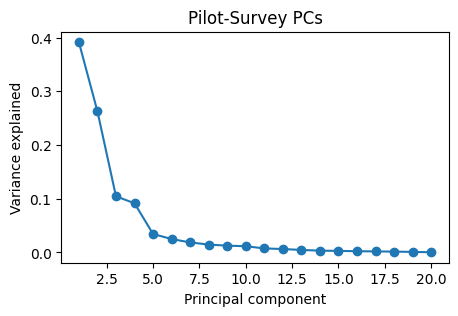

In [26]:
scaler = StandardScaler()
X      = scaler.fit_transform(pilot_avg)
pca    = PCA().fit(X)

# scree plot
plt.figure(figsize=(5,3))
plt.plot(np.arange(1, pca.n_components_+1), pca.explained_variance_ratio_, "o-")
plt.xlabel("Principal component")
plt.ylabel("Variance explained")
plt.title("Pilot-Survey PCs")
plt.show()

In [27]:
# print first 3 loading vectors
loadings = pd.DataFrame(pca.components_.T,
                        index=pilot_avg.columns,
                        columns=[f"PC{i}" for i in range(1, pca.n_components_+1)])
print(loadings.iloc[:, :3].round(1))

                 PC1  PC2  PC3
Q1_Attentive     0.3  0.0  0.0
Q1_Excited       0.3  0.1  0.1
Q1_Happy         0.1  0.2  0.5
Q1_Engaged       0.3 -0.0  0.0
Q1_Curious       0.3 -0.0 -0.1
Q1_Motivated     0.2  0.3 -0.0
Q1_Comforted     0.1  0.4  0.1
Q1_Annoyed      -0.2  0.3 -0.1
Q1_Indifferent  -0.2  0.4 -0.1
Q2_Relatable     0.1  0.3  0.1
Q2_Funny        -0.1  0.2  0.5
Q2_Confusing     0.1  0.3 -0.2
Q2_Predictable  -0.2  0.3 -0.0
Q2_Entertaining  0.3 -0.1  0.3
Q2_Fantasy       0.1  0.2 -0.1
Q2_Original      0.3  0.1  0.2
Q2_Believable    0.1  0.1 -0.1
Q2_Boring       -0.2  0.4 -0.1
Q2_Dramatic      0.2  0.0 -0.4
Q2_Suspenseful   0.3  0.0 -0.3


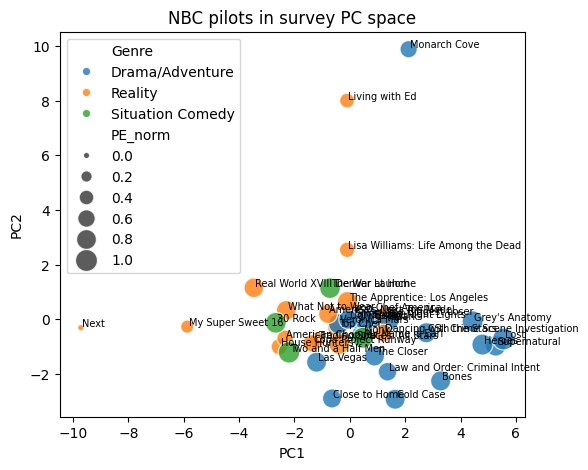

In [28]:
# project data into PC space
Z = pca.transform(X)
zpilot_df = (
    pd.DataFrame(Z, columns=[f"PC{i}" for i in range(1, pca.n_components_+1)])
      .assign(Shows=shows.index)
      .join(shows.reset_index(drop=True))
)

zpilot_df["PE_norm"] = (zpilot_df["PE"] - zpilot_df["PE"].min()) \
                       / (zpilot_df["PE"].max() - zpilot_df["PE"].min())

# ---------- STATIC ----------------------------------------------------------
plt.figure(figsize=(6, 5))
sns.scatterplot(
    data=zpilot_df,
    x="PC1", y="PC2",
    hue="Genre",
    size="PE_norm",          # bigger bubble == bigger PE
    sizes=(20, 250),         # min & max dot size in points²
    alpha=0.8,               # one scalar alpha for *all* points
    legend="brief"
)

# add labels
for _, r in zpilot_df.iterrows():
    plt.text(r["PC1"] + .05, r["PC2"] + .05, r["Shows"], fontsize=7)

plt.title("NBC pilots in survey PC space")
plt.show()


In [29]:

# ---------- INTERACTIVE -----------------------------------------------------
fig = px.scatter(
    zpilot_df, x="PC1", y="PC2",
    color="Genre",
    size="PE_norm",              # same visual cue as above
    size_max=25,
    hover_name="Shows",
    opacity=0.85                 # one scalar for the whole trace
)
fig.update_layout(title="NBC pilots in survey PC space (interactive)")
fig.show()